# BFS

$V$ is the number of nodes/vertices.

- Initialize $\Theta(V)$
- Search $\Theta(V + E)$ as:
    - Each vertex is in the Queue once $\Theta(V)$.
    - The adjacency list of each vertex is traversed once
    - Each edge appears twice overall in adjacency list $\Theta(E)$

In [1]:
from src.graph.bfs import BFSGraph as Graph, Vertex, Queue

def initialize(start: Vertex, G: Graph, Q: Queue) -> None:
    for vertex in G.vertices:
        vertex.visited = False
        vertex.parent = None

    start.visited = True
    start.distance = 0

    Q.put(start)

def breadth_first_search(start: Vertex, G: Graph) -> None:
    Q = Queue()
    initialize(start, G, Q)

    while not Q.empty():
        u = Q.get()

        for v in G.neighbors_of(u):
            if not v.visited:
                v.visited = True
                v.distance = u.distance + 1
                v.parent = u
                Q.put(v)

## Breadth First Search on Undirected Graph

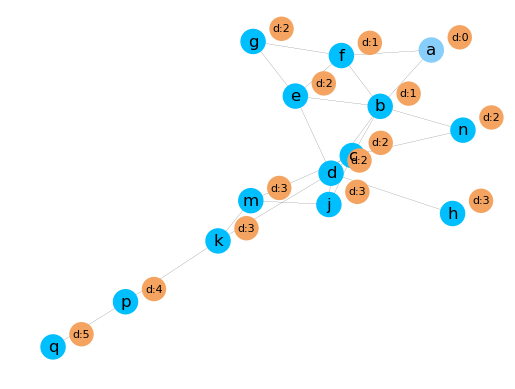

In [2]:
from src.graph.bfs import breadth_first_search, BFSGraph
from src.display import Display

adj = BFSGraph.from_template({
    "a": ["b", "f"],
    "b": ["n", "e", "c", "d", "a"],
    "c": ["n", "b", "d", "j", "m"],
    "d": ["b", "e", "c", "j", "h", "k"],
    "e": ["f", "b", "g", "d"],
    "f": ["a", "g", "e", "b"],
    "g": ["f", "e"],
    "h": ["d"],
    "j": ["c", "d", "m"],
    "k": ["p"],
    "m": ["c", "j", "k"],
    "n": ["b", "c"],
    "p": ["k", "q"],
    "q": ["p"],
})

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

tree = breadth_first_search(start, adj)

Display.md("## Breadth First Search on Undirected Graph")

adj.render.graph(
    node_labels=['distance'],
    node_label_prefixes=['d'],
    node_label_offset=0.02,
    seed=100,
)

In [3]:
Display.md("### Breadth First Search Call Tree")

tree.render(tree.root).to_image()

### Breadth First Search Call Tree

## Directed

## Breadth First Search on Directed Graph

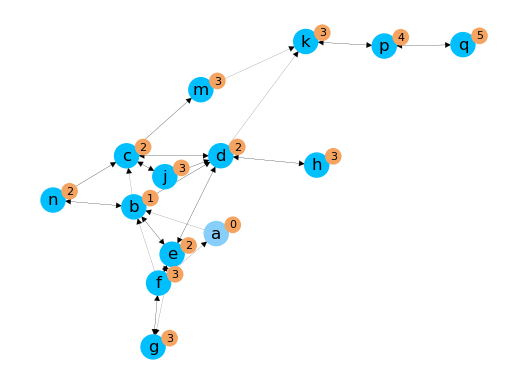

In [4]:
adj = BFSGraph.from_template({
    "a": ["b"],
    "b": ["n", "e", "c", "d"],
    "c": ["n", "d", "j", "m"],
    "d": ["b", "e", "c", "j", "h", "k"],
    "e": ["f", "b", "g", "d"],
    "f": ["a", "g", "e", "b"],
    "g": ["f",],
    "h": ["d"],
    "j": ["c", "d"],
    "k": ["p"],
    "m": ["c", "k"],
    "n": ["b", "c"],
    "p": ["k", "q"],
    "q": ["p"],
})

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

tree = breadth_first_search(start, adj)

Display.md("## Breadth First Search on Directed Graph")

adj.render.digraph(
    node_labels=['distance'],
    seed=2332423,
)

In [5]:
Display.md("### Breadth First Search Call Stack")

tree.render(tree.root).to_image()

### Breadth First Search Call Stack

# DFS

$V$ is the number of nodes/vertices.

- Initialize $\Theta(V)$
- DFSVisit $\Theta(V + E)$

In [6]:
from src.graph.dfs import DFSGraphBase as Graph, Vertex, NodeColor

def initialize(s: Vertex, G: Graph) -> None:
    for vertex in G.vertices:
        vertex.visited = False
        vertex.parent = None

    s.distance = 0
    s.color = NodeColor.START_FROM.value


def dfs_visit(
    u: Vertex,
    G: Graph,
):
    u.visited = True

    for v in G.neighbors_of(u):
        if not v.visited:
            assert u.distance is not None
            v.distance = u.distance + 1
            v.parent = u
            dfs_visit(v, G)


def dfs(start: Vertex, G: Graph):
    initialize(start, G)
    dfs_visit(start, G)

## Depth First Search on Undirected Graph

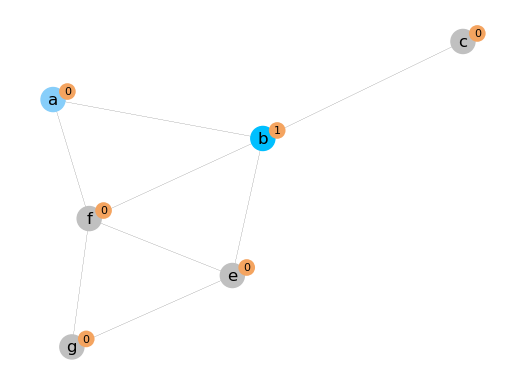

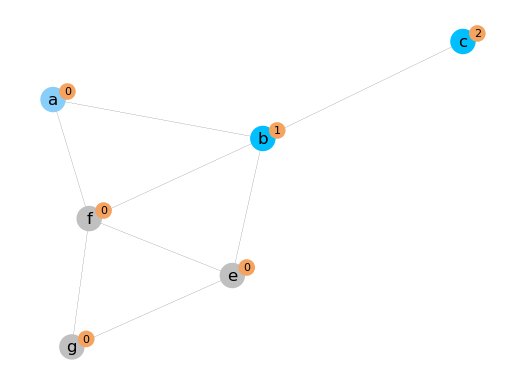

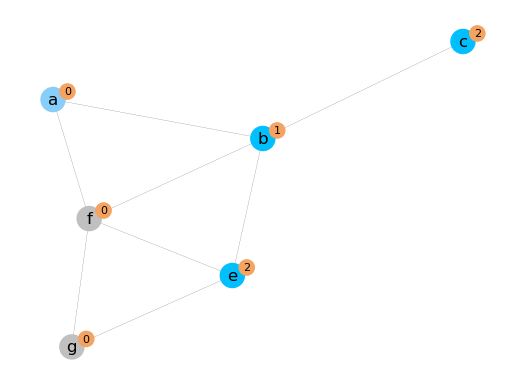

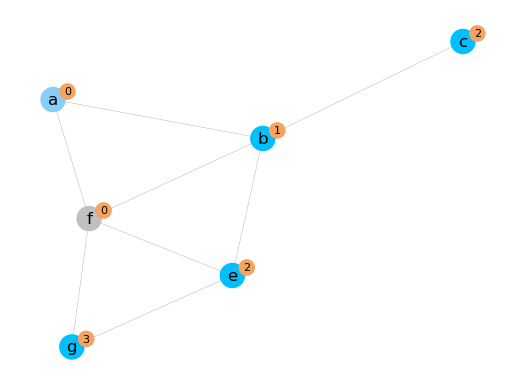

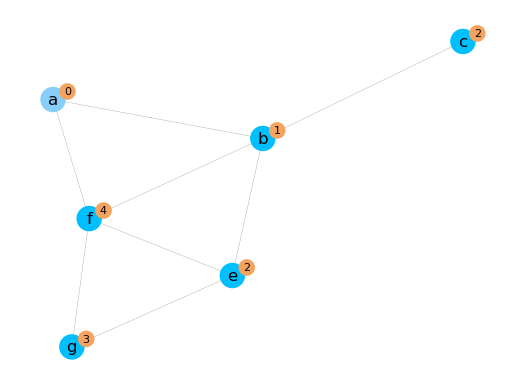

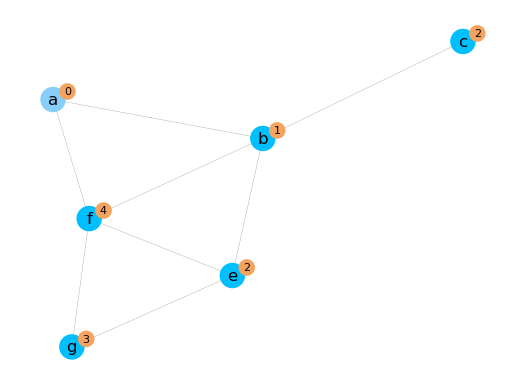

In [7]:
from src.graph.dfs import depth_first_search, DFSGraph

adj = DFSGraph.from_template({
    "a": ["b", "f"],
    "b": ["a", "c", "e", "f"],
    "c": ["b"],
    "e": ["g", "f", "b"],
    "f": ["a", "g", "e", "b"],
    "g": ["f", "e"],
})

assert adj.is_valid_undirected

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

tree = depth_first_search(start, adj)

Display.md("## Depth First Search on Undirected Graph")

for snapshot in adj.snapshots:
    snapshot.render.graph(
        node_labels=['distance'],
        seed=100,  
    )

adj.render.graph(
    node_labels=['distance'],
    seed=100,
)


In [8]:

Display.md("### Depth First Search Call Stack")
tree.render(tree.root).to_image()

### Depth First Search Call Stack

### Directed Graph

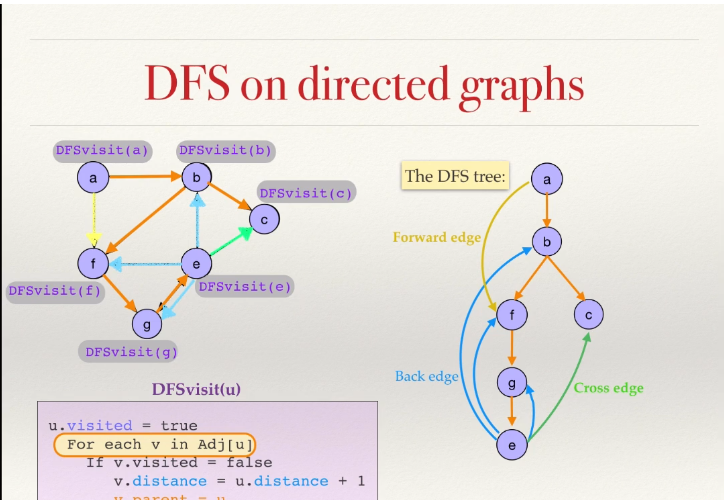

## Depth First Search on Directed Graph

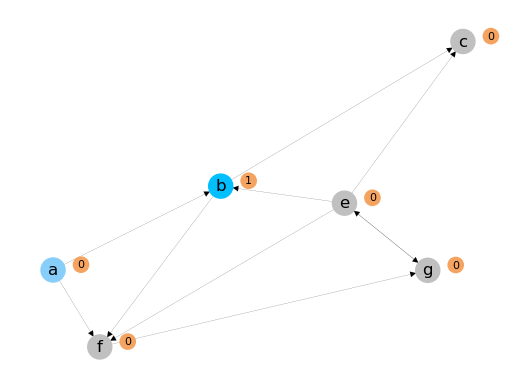

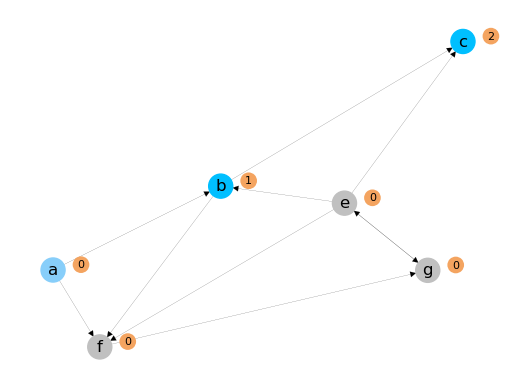

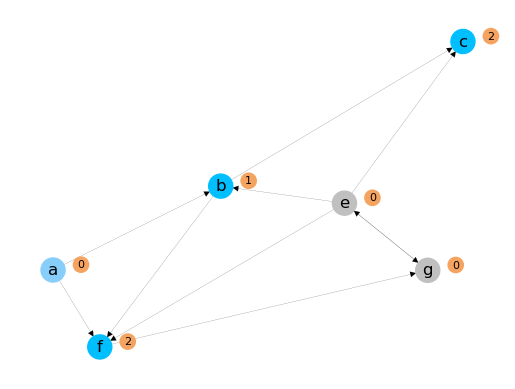

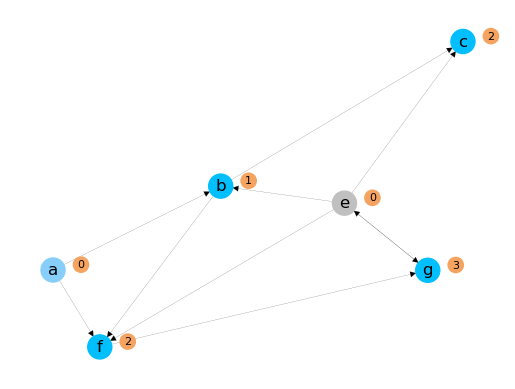

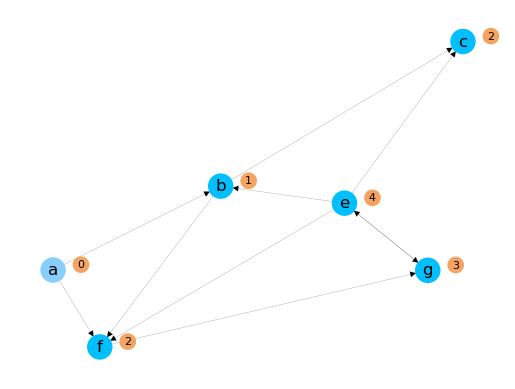

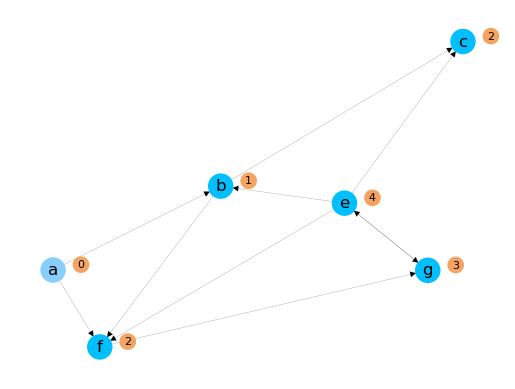

In [9]:
from src.graph.dfs import DFSGraph, depth_first_search

adj = DFSGraph.from_template({
    "a": ["b", "f"],
    "b": ["c", "f"],
    "c": [],
    "e": ["c", "f", "b", "g"],
    "f": ["g"],
    "g": ["e"],
})

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

tree = depth_first_search(start, adj)

Display.md("## Depth First Search on Directed Graph")

for snapshot in adj.snapshots:
    snapshot.render.digraph(
        node_labels=['distance'],
        node_label_offset=-0.02,
        seed=100,  
    )

adj.render.digraph(
    node_labels=['distance'],
    node_label_offset=-0.02,
    seed=100,
)


In [10]:
Display.md("### Depth First Search Call Stack")
tree.render(tree.root).to_image()

### Depth First Search Call Stack

#### Topological Sort

1. Call DFS using timestamps $\Theta(V+E)$
2. Order the vertices $\Theta(V)$

Runtime is $\Theta(V+E)$

## Topological Sort on Directed Graph Part 1

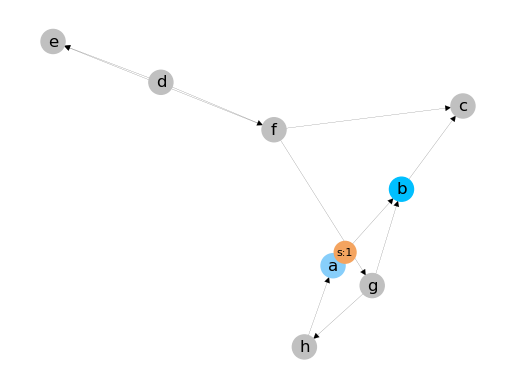

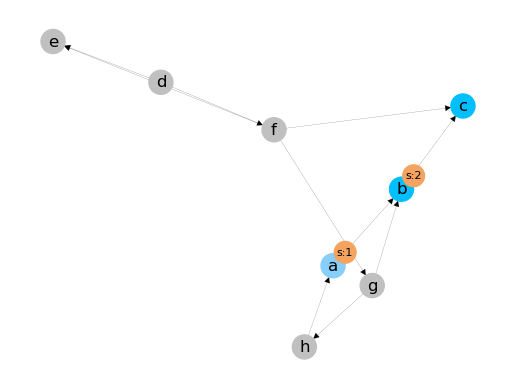

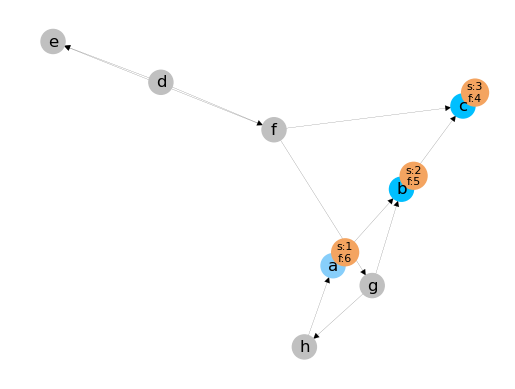

In [11]:
from src.graph.dfs import depth_first_search, Timer, dfs_visit, NodeColor, DFSGraph

adj = DFSGraph.from_template({
    "a": ["b"],
    "b": ["c"],
    "c": [],
    "d": ["f", "e"],
    "e": [],
    "f": ["g", "c", "e"],
    "g": ["h", "b"],
    "h": ["a"]
})

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

timer = Timer(0)
tree = depth_first_search(start, adj, timer)

Display.md("## Topological Sort on Directed Graph Part 1")

for snapshot in adj.snapshots:
    snapshot.render.digraph(
        node_labels=['start_time', 'end_time'],
        node_label_prefixes=['s', 'f'],
        node_label_offset=0.0,
        seed=2
    )

adj.render.multidigraph(
    node_labels=['start_time', 'end_time'],
    node_label_prefixes=['s', 'f'],
    node_label_offset=0.0,
    seed=2
)

## Topological Sort on Directed Graph Part 2

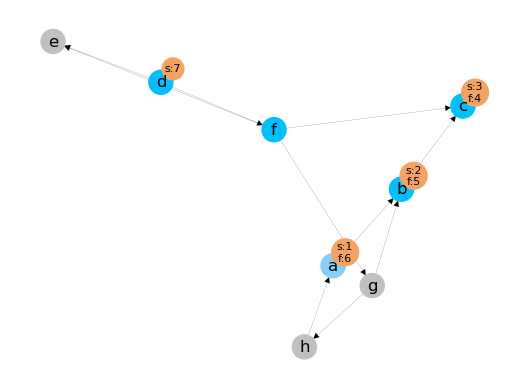

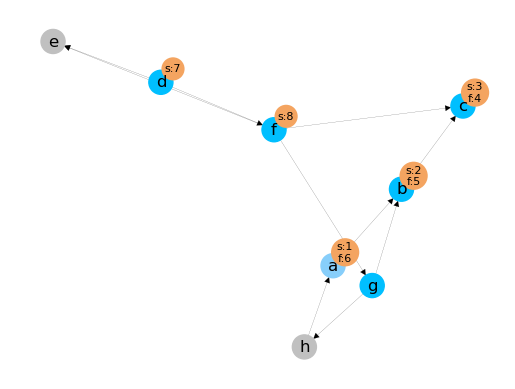

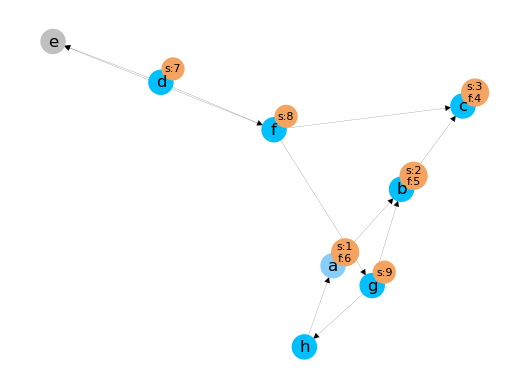

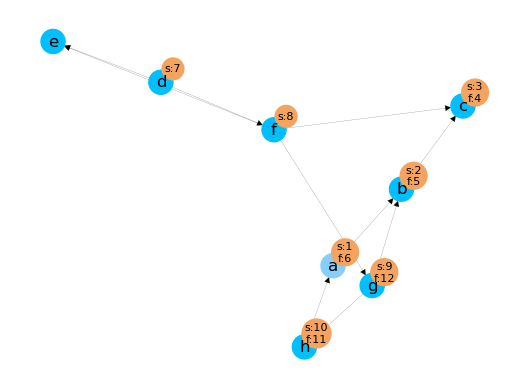

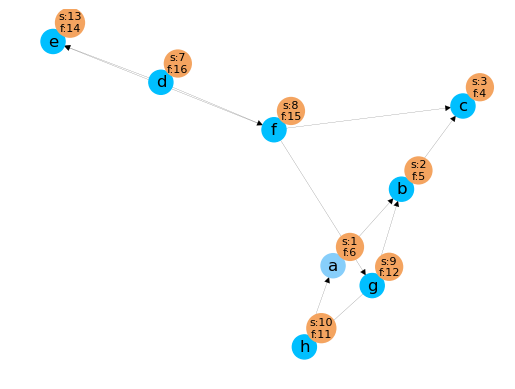

In [12]:
start = adj.node_by_key("d")
assert start is not None
start.distance = 0
start.color = NodeColor.VISITED.value
tree = dfs_visit(start, adj)

timer.done()

Display.md("## Topological Sort on Directed Graph Part 2")

for snapshot in adj.snapshots[2:]:
    snapshot.render.digraph(
        node_labels=['start_time', 'end_time'],
        node_label_prefixes=['s', 'f'],
        node_label_offset=0.0,
        seed=2
    )

adj.render.multidigraph(
    node_labels=['start_time', 'end_time'],
    node_label_prefixes=['s', 'f'],
    node_label_offset=0.02,
    seed=2
)

In [13]:
Display.md("### Topological Sort")

adj.render.topological_sort.to_image()

### Topological Sort

#### Strongly Connected Components

### DFS Visited SCC Graph

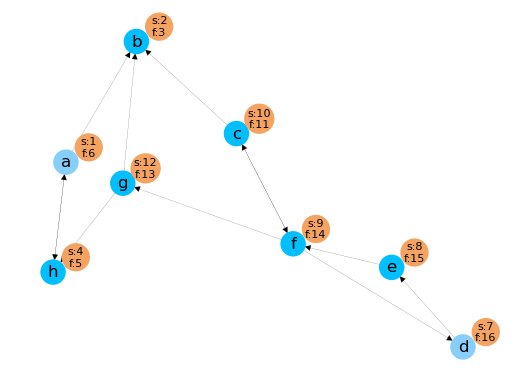

### Topological Sort

In [14]:
from src.graph.dfs import depth_first_search, dfs_visit, Timer, NodeColor, DFSGraph

adj = DFSGraph.from_template({
    "a": ["b", "h"],
    "b": [],
    "c": ["b", "f"],
    "d": ["e"],
    "e": ["f"],
    "f": ["c", "d", "g"],
    "g": ["h", "b"],
    "h": ["a"]
})

assert adj is not None
start = adj.node_by_key("a")
assert start is not None

timer = Timer(0)
tree = depth_first_search(start, adj, timer)

assert adj is not None
start = adj.node_by_key("d")
assert start is not None
start.distance = 0
start.color = NodeColor.START_FROM.value

tree = dfs_visit(start, adj)
timer.done()

Display.md("### DFS Visited SCC Graph")

adj.render.multidigraph(
    node_labels=['start_time', 'end_time'],
    node_label_prefixes=['s', 'f'],
    node_label_offset=0.04,
    seed=1111
)

Display.md("### Topological Sort")

adj.render.topological_sort.to_image()

### SCC Graph Calls

### Transposed SCC Graph

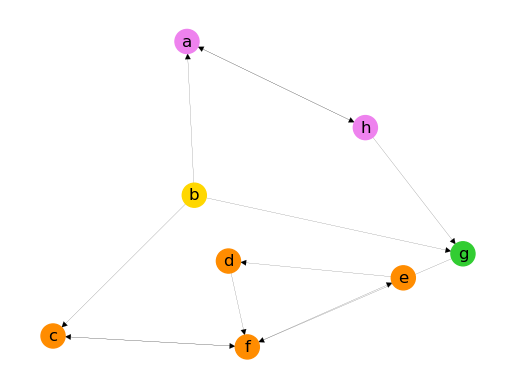

### SCC Graph

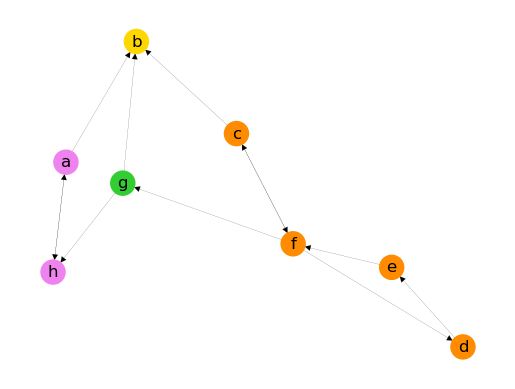

In [15]:
adj_with_color, rev_adj, trees = adj.strongly_connected_components()

Display.md("### SCC Graph Calls")
for tree in trees:
    tree.render(tree.root).to_image()

Display.md("### Transposed SCC Graph")

rev_adj.render.multidigraph()

Display.md("### SCC Graph")
adj_with_color.render.multidigraph()

## Minimum Spanning Tree

### Prims Algorithm

1. $O(V)$ to build the heap
2. Getting the minimum node $O(\log V)$ for $V$ times, so $O(V \log V)$
3. Decrease key $O(E)$ times, which takes $(O \log V)$ each iteration, so $O(E \log V)$

$O(E \log V)$

### MST Prim Graph

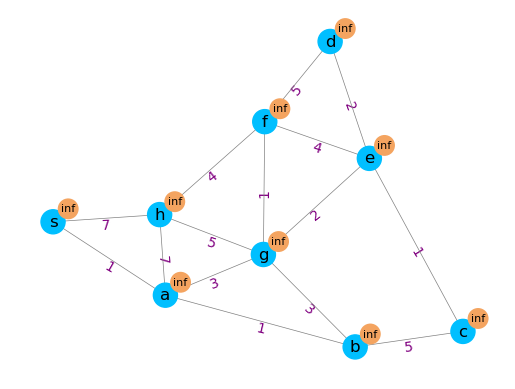

In [16]:
from src.graph.mst.prim import MSTGraph, minimum_spanning_tree


adj = MSTGraph.from_template({
    "s": [("a", 1), ("h", 7)],
    "a": [("s", 1), ("b", 1), ("g", 3), ("h", 7)],
    "b": [("a", 1), ("c", 5), ("g", 3)],
    "c": [("b", 5), ("e", 1)],
    "d": [("e", 2), ("f", 5)],
    "e": [("c", 1), ("d", 2), ("f", 4), ("g", 2)],
    "f": [("d", 5), ("e", 4), ("g", 1), ("h", 4)],
    "g": [("a", 3), ("b", 3), ("e", 2), ("f", 1), ("h", 5)],
    "h": [("a", 6), ("s", 7)]
})

Display.md("### MST Prim Graph")

adj.render.graph(
    node_labels=['distance'],
    edge_labels=['weight'],
    edge_font_color="purple",
    node_label_offset=0.02,
    line_width=0.5,
    seed=2,
)

### MST Prim Call Stack

### MST Prim Steps

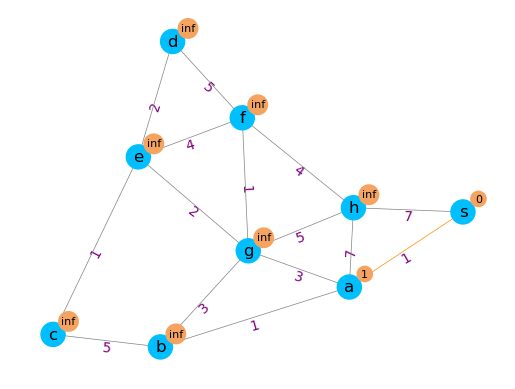

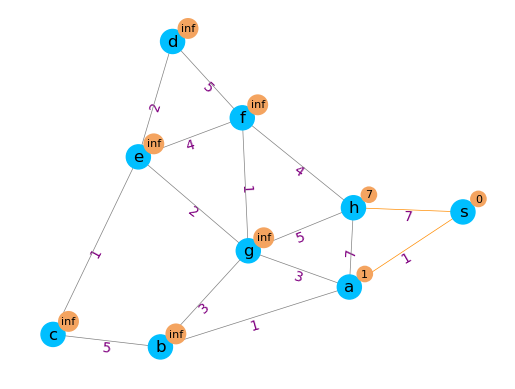

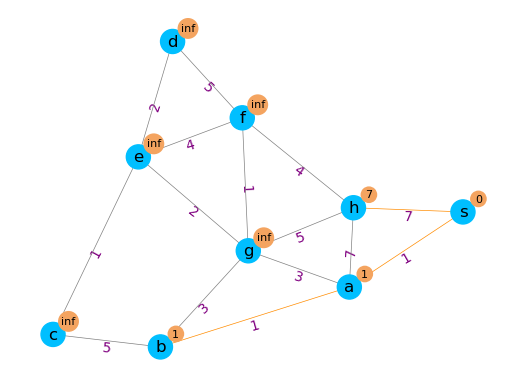

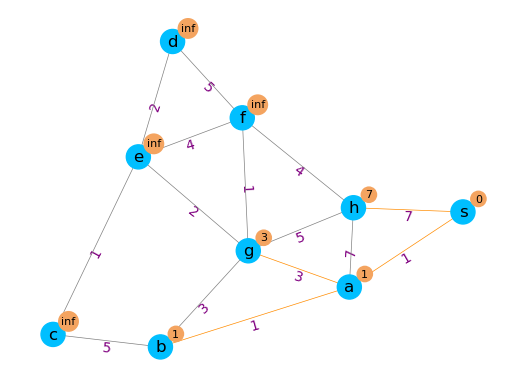

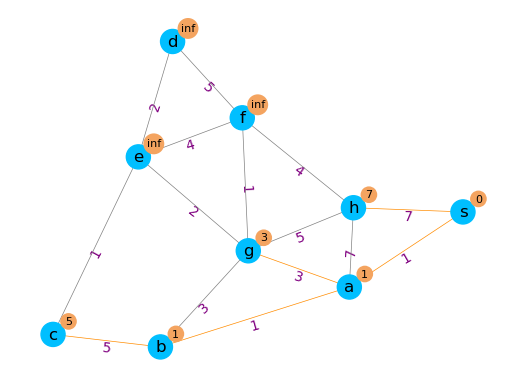

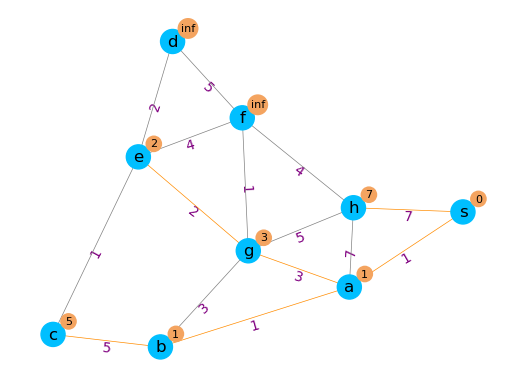

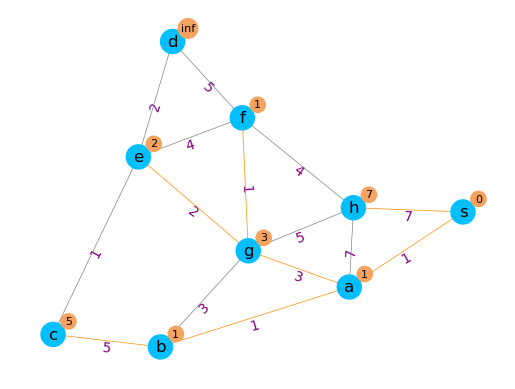

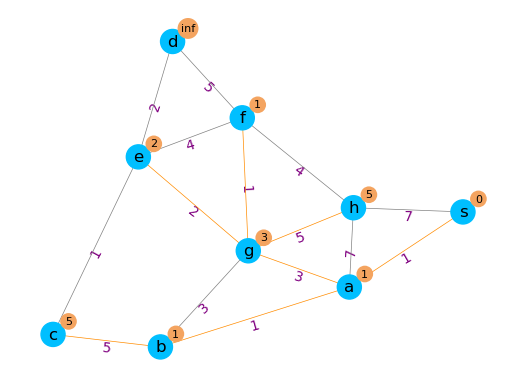

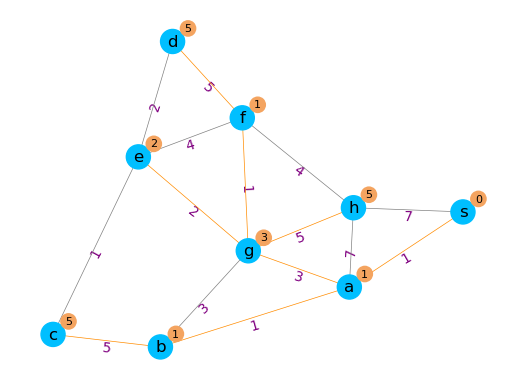

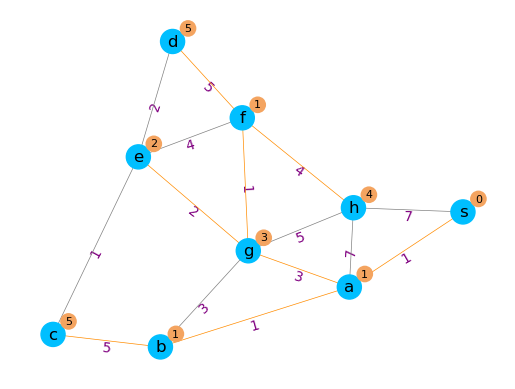

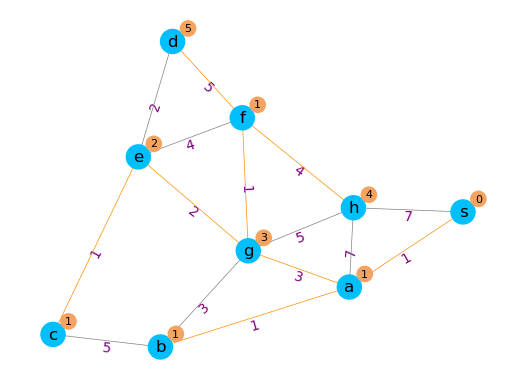

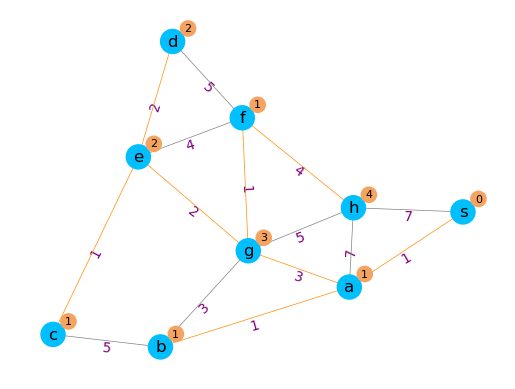

In [17]:
start = adj.node_by_key("s")
assert start is not None

tree = minimum_spanning_tree(start, adj)
Display.md("### MST Prim Call Stack")
tree.render(tree.root).to_image()


Display.md("### MST Prim Steps")
for snapshot in adj.snapshots:
    snapshot.render.graph(
        node_labels=['distance'],
        edge_labels=['weight'],
        edge_font_color="purple",
        node_label_offset=0.02,
        line_width=0.5,
        seed=2,
    )


### Kruskal's Algorithm


### MST Kruskal's Graph

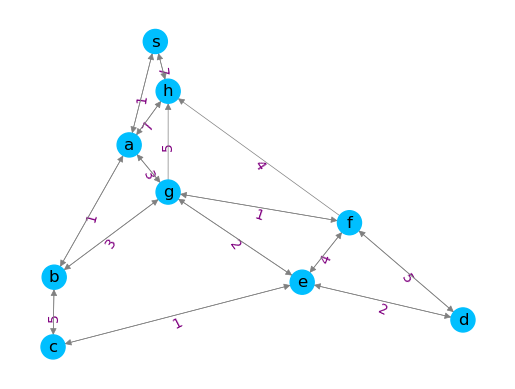

In [18]:
from src.graph.mst.kruskals import KruskalsGraph, minimum_spanning_tree


adj = KruskalsGraph.from_template({
    "s": [("a", 1), ("h", 7)],
    "a": [("s", 1), ("b", 1), ("g", 3), ("h", 7)],
    "b": [("a", 1), ("c", 5), ("g", 3)],
    "c": [("b", 5), ("e", 1)],
    "d": [("e", 2), ("f", 5)],
    "e": [("c", 1), ("d", 2), ("f", 4), ("g", 2)],
    "f": [("d", 5), ("e", 4), ("g", 1), ("h", 4)],
    "g": [("a", 3), ("b", 3), ("e", 2), ("f", 1), ("h", 5)],
    "h": [("a", 6), ("s", 7)]
})

Display.md("### MST Kruskal's Graph")

adj.render.digraph(
    edge_labels=['weight'],
    edge_font_color="purple",
    node_label_offset=0.02,
    line_width=0.5,
    seed=111,
)

### MST Kruskal's Steps

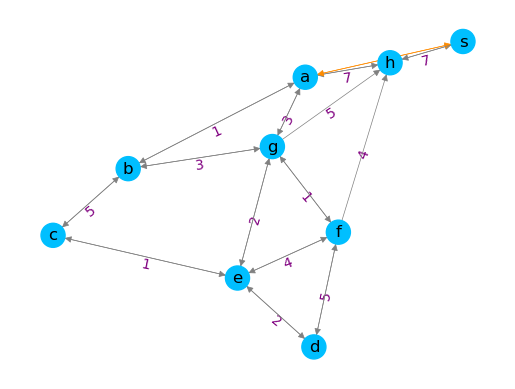

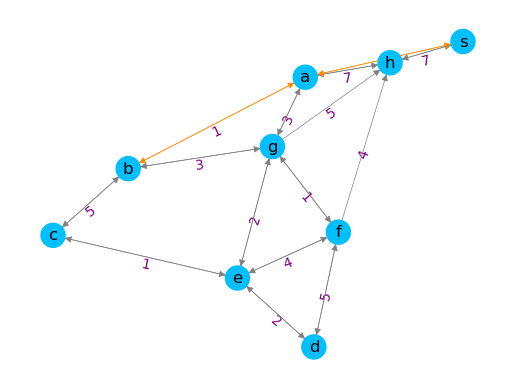

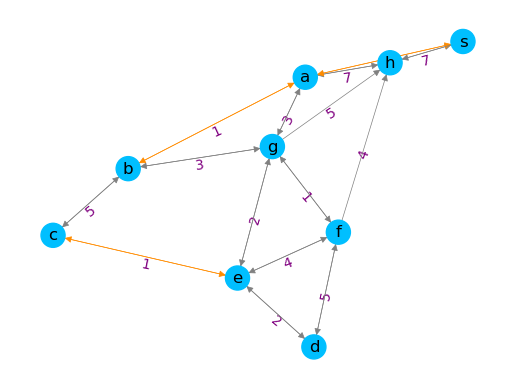

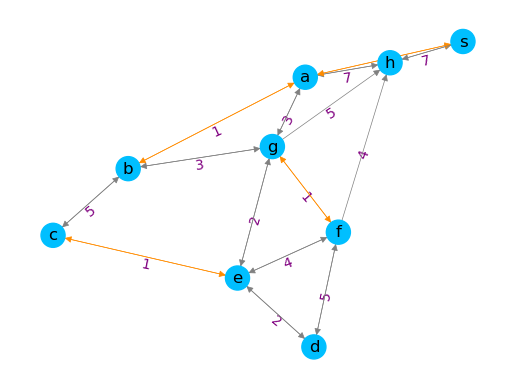

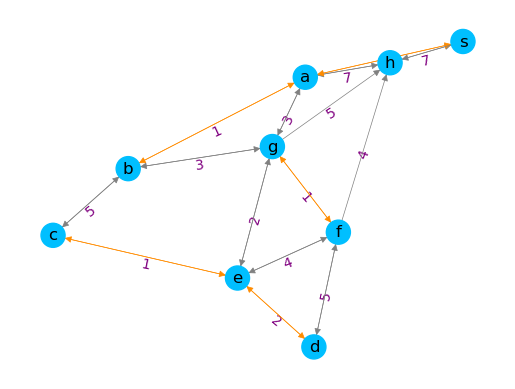

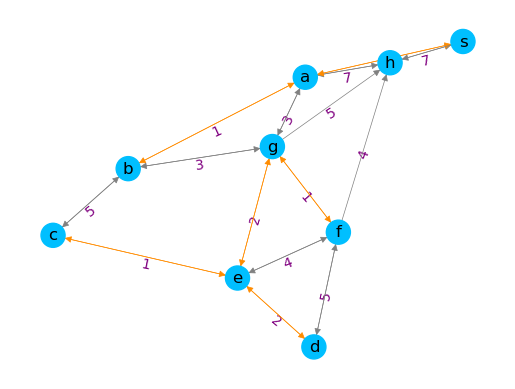

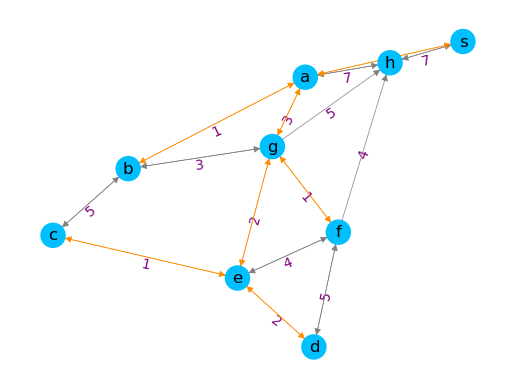

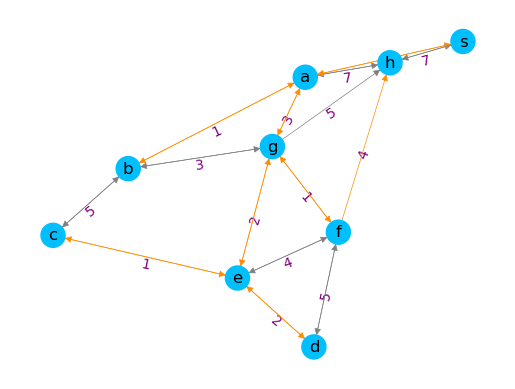

In [19]:
start = adj.node_by_key("s")
assert start is not None

tree = minimum_spanning_tree(adj)
# tree.render(tree.root).to_image()

Display.md("### MST Kruskal's Steps")

for snapshot in adj.snapshots:
    snapshot.render.digraph(
        edge_labels=['weight'],
        edge_font_color="purple",
        node_label_offset=0.02,
        line_width=0.5,
        seed=111,
    )

## Single Source Shortest Path

### Dijkstra's Algorithm


### SSSP Dikstra's Graph

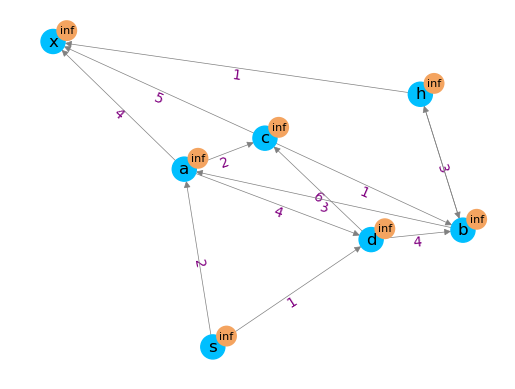

In [20]:
from src.graph.sssp.dijkstra import MSTGraph, single_source_shortest_path

adj = MSTGraph.from_template({    
    "s": [("a", 2), ("d", 1)],
    "a": [("c", 2), ("d", 4), ("x", 4)],
    "b": [("a", 3), ("h", 3)],
    "c": [("b", 1), ("x", 5)],
    "d": [("c", 6), ("b", 4)],
    "h": [("b", 2), ("x", 1)],
    "x": [],
})


Display.md("### SSSP Dikstra's Graph")

adj.render.digraph(
    edge_labels=['weight'],
    edge_font_color="purple",
    node_labels=['distance'],
    node_label_offset=0.01,
    line_width=0.5,
    seed=3,
)

### SSSP Dikstra's Call Stack

### SSSP Dikstra's Steps

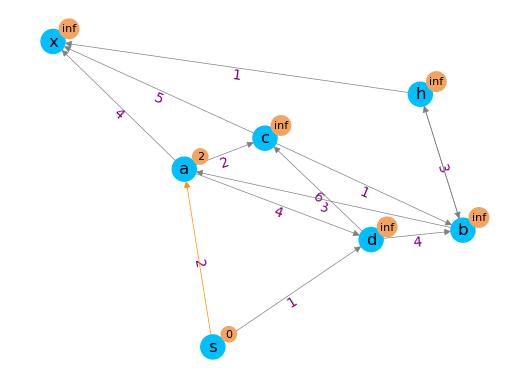

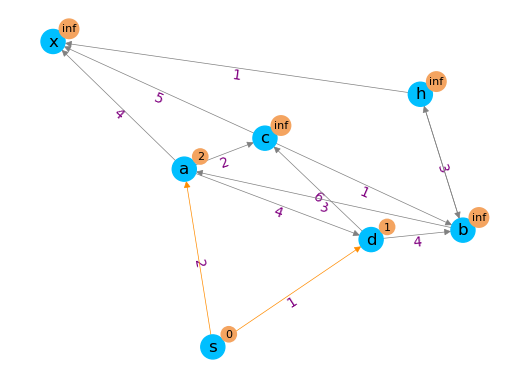

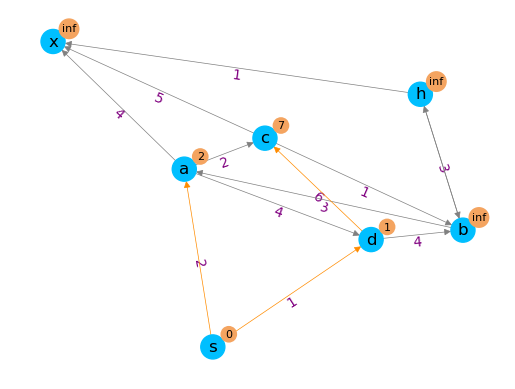

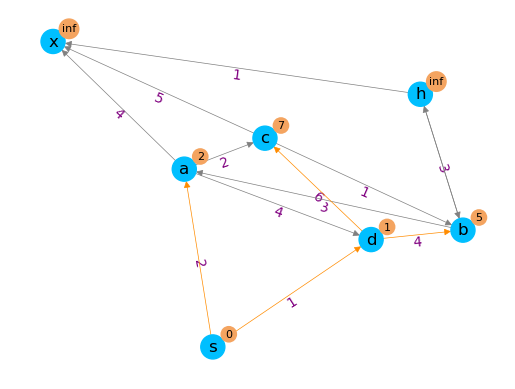

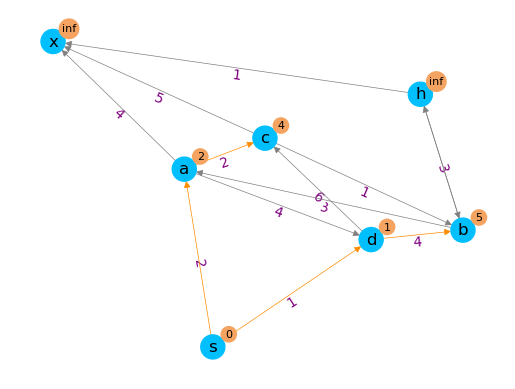

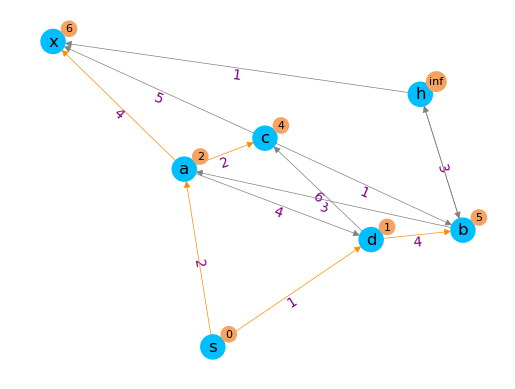

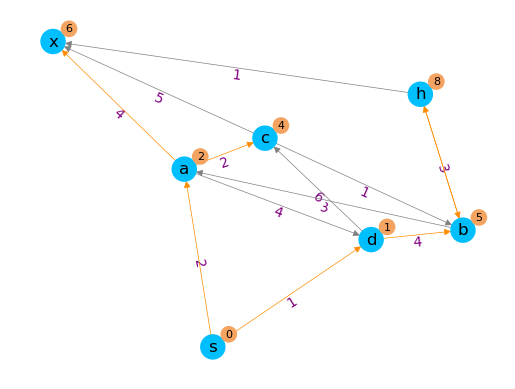

In [21]:
start = adj.node_by_key("s")
assert start is not None

tree = single_source_shortest_path(start, adj)

Display.md("### SSSP Dikstra's Call Stack")
tree.render(tree.root).to_image()

Display.md("### SSSP Dikstra's Steps")

for snapshot in adj.snapshots:
    snapshot.render.digraph(
        edge_labels=['weight'],
        edge_font_color="purple",
        node_labels=['distance'],
        node_label_offset=0.02,
        line_width=0.5,
        seed=3,
    )

### Bellman Ford

### SSSP Bellman Ford Graph

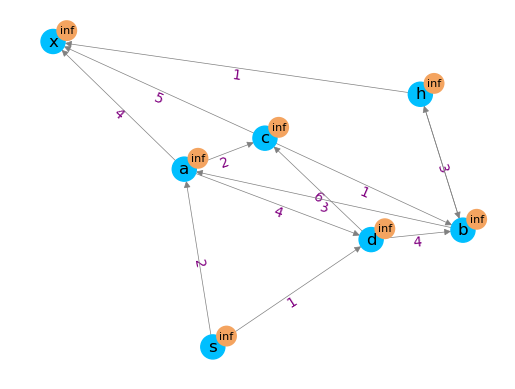

In [22]:
from src.graph.sssp.bellman_ford import MSTGraph, single_source_shortest_path

adj = MSTGraph.from_template({    
    "s": [("a", 2), ("d", 1)],
    "a": [("c", 2), ("d", 4), ("x", 4)],
    "b": [("a", 3), ("h", 3)],
    "c": [("b", 1), ("x", 5)],
    "d": [("c", 6), ("b", 4)],
    "h": [("b", 2), ("x", 1)],
    "x": [],
})

Display.md("### SSSP Bellman Ford Graph")

adj.render.digraph(
    edge_labels=['weight'],
    edge_font_color="purple",
    node_labels=['distance'],
    node_label_offset=0.01,
    line_width=0.5,
    seed=3,
)

### SSSP Bellman Ford Call Stack

### SSSP Bellman Ford Steps

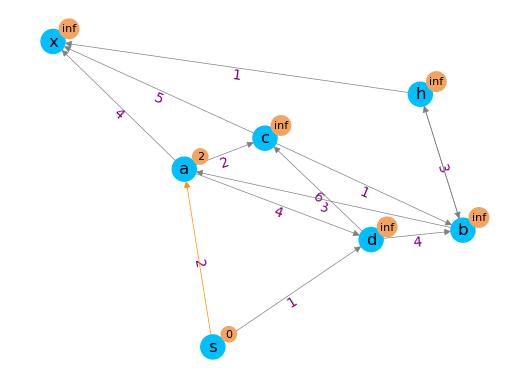

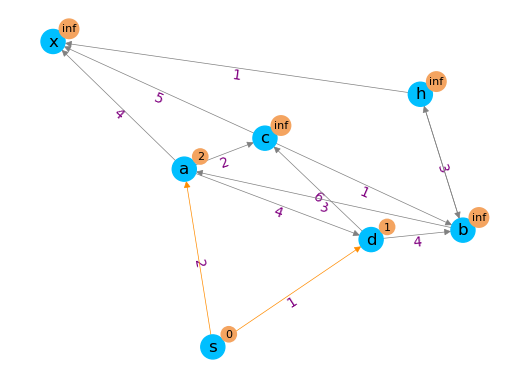

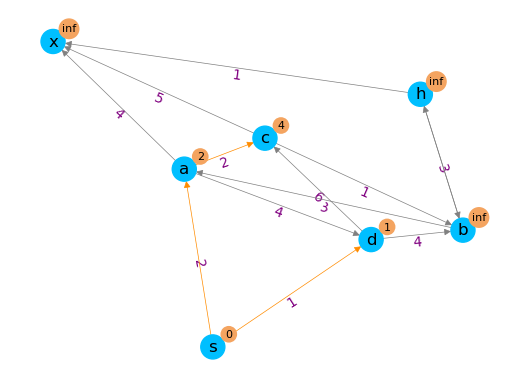

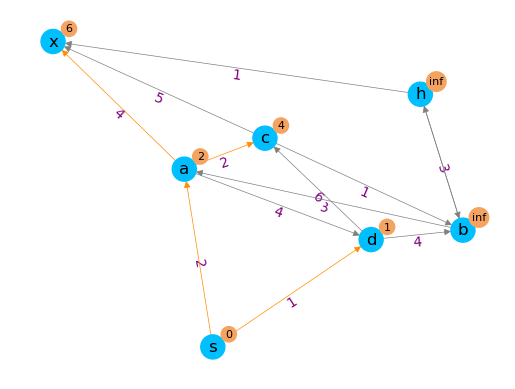

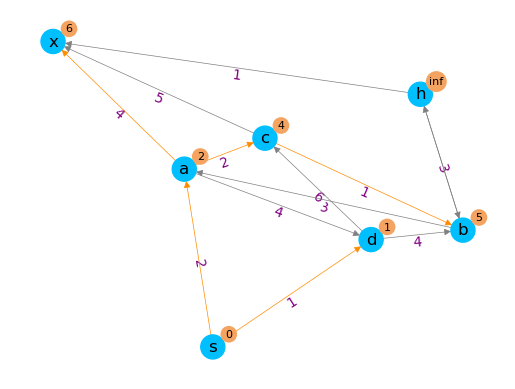

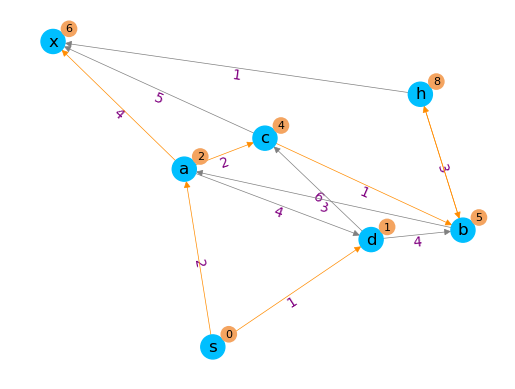

In [23]:
s = adj.node_by_key("s")

tree = single_source_shortest_path(adj.node_by_key("s"), adj)
Display.md("### SSSP Bellman Ford Call Stack")
tree.render(tree.root).to_image()


Display.md("### SSSP Bellman Ford Steps")
for snapshot in adj.snapshots:
    snapshot.render.digraph(
        edge_labels=['weight'],
        edge_font_color="purple",
        node_labels=['distance'],
        node_label_offset=0.02,
        line_width=0.5,
        seed=3,
    )

## Dag Shortest Path

1. Topologically sort the vertices of G. $O(V + E)$
2. Initialize the distances: `v.d = ∞` for all vertices, except `s.d = 0`. $O(V)$
3. Loop through the vertices in the order they appear in the topological sort. $O(V + E)$

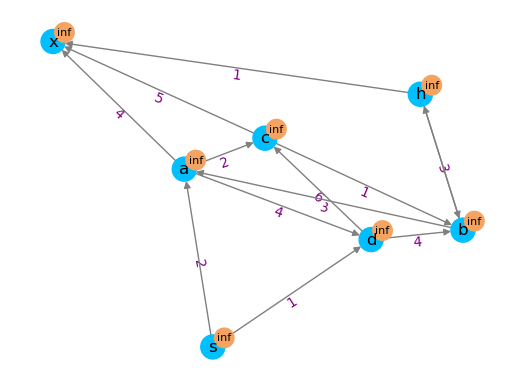

Relaxing edge s -> a
Relaxing edge s -> d
Relaxing edge a -> c
Relaxing edge a -> x
Relaxing edge d -> b
Relaxing edge b -> h


### SSSP DAG Graph

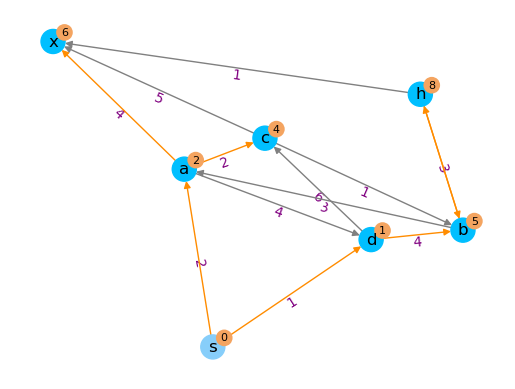

In [24]:
from src.graph.dfs import depth_first_search, Timer, dfs_visit_whole_graph, NodeColor, DFSGraph
from src.graph.mst.prim import MSTGraph
from src.display import Display
from src.graph.color import EdgeColor

adj = MSTGraph.from_template({    
    "s": [("a", 2), ("d", 1)],
    "a": [("c", 2), ("d", 4), ("x", 4)],
    "b": [("a", 3), ("h", 3)],
    "c": [("b", 1), ("x", 5)],
    "d": [("c", 6), ("b", 4)],
    "h": [("b", 2), ("x", 1)],
    "x": [],
})

adj.render.digraph(
    node_labels=['distance'],
    edge_labels=['weight'],
    edge_font_color="purple",
    line_width=1,
    seed=3
)


dfs_visit_whole_graph(adj.node_by_key('s'), adj)

adj.render.topological_sort.to_image()

for u in adj.topological_sort[1:]:
    u.distance = float("inf")

adj.topological_sort[0].distance = 0

for u in adj.topological_sort:
    for v in adj.neighbors_of(u):
        e = adj.edges_by_node_coords(u, v)
        if v.distance > u.distance + e.weight:
            print(f"Relaxing edge {u.key} -> {v.key}")
            e.color = EdgeColor.LINE_VISITED.value
            v.distance = u.distance + e.weight
            v.parent = u

Display.md("### SSSP DAG Graph")

adj.render.digraph(
    node_labels=['distance'],
    edge_labels=['weight'],
    edge_font_color="purple",
    line_width=1,
    seed=3
)
